<a href="https://colab.research.google.com/github/Geoffrey-Z/Multivariate-Time-Series-Forecasting-with-LSTMs-in-Keras-for-CORN-SWEET-Terminal-Market-Price/blob/master/CORN_SWEET_Price_Weekly_Univariate_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/1000
768/768 - 1s - loss: 0.0153 - mae: 0.0909
Epoch 2/1000
768/768 - 1s - loss: 0.0060 - mae: 0.0591
Epoch 3/1000
768/768 - 1s - loss: 0.0038 - mae: 0.0457
Epoch 4/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0434
Epoch 5/1000
768/768 - 1s - loss: 0.0037 - mae: 0.0438
Epoch 6/1000
768/768 - 1s - loss: 0.0037 - mae: 0.0438
Epoch 7/1000
768/768 - 1s - loss: 0.0037 - mae: 0.0431
Epoch 8/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0432
Epoch 9/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0433
Epoch 10/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0432
Epoch 11/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0429
Epoch 12/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0435
Epoch 13/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0438
Epoch 14/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0433
Epoch 15/1000
768/768 - 1s - loss: 0.0037 - mae: 0.0434
Epoch 16/1000
768/768 - 1s - loss: 0.0037 - mae: 0.0435
Epoch 17/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0435
Epoch 18/1000
768/768 - 1s - loss: 0.0036 - mae: 0.0434
E

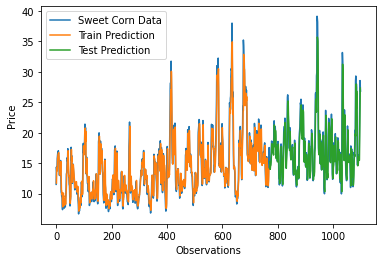

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)



np.random.seed(7)

np.random.seed(7)

df = pd.read_csv("https://raw.githubusercontent.com/Geoffrey-Z/Multivariate-Time-Series-Forecasting-with-LSTMs-in-Keras-for-CORN-SWEET-Terminal-Market-Price/master/Dataset/BI-COLOR%20CORN-SWEET%20WEEKLY%20PRICE%201998-2018.csv", usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.7), :]
test_dataset = dataset[int(len(dataset)*0.7):, :]

lookback = 1
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
# Check LSTM
model.add(LSTM(4, input_shape=(1, lookback)))
#return_sequences=True, model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Sweet Corn Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('my_model.h5')

In [ ]:
model = load_model('my_model.h5')

In [ ]:
from sklearn.metrics import r2_score
trainScore = math.sqrt(r2_score(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f R2' % (trainScore))
testScore = math.sqrt(r2_score(testY[0], testPredict[:,0]))
print('Test Score: %.2f R2' % (testScore))

Train Score: 0.92 R2
Test Score: 0.85 R2
